In [1]:
# 1. Generate a short creative story based on a given theme using a pre-trained GPT-2 model.
!pip install transformers
from transformers import pipeline
generator = pipeline("text-generation", model="gpt2")
prompt = "A brave astronaut lands on Mars and discovers"
result = generator(prompt, max_length=60, num_return_sequences=1)
print("Generated Story:\n")
print(result[0]['generated_text'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated Story:

A brave astronaut lands on Mars and discovers the planet's atmosphere, though he is soon confronted by a group of aliens. The group's leader is an alien named "The Martian Man." Written by mr.


In [2]:
# 2. Generate an image based on a descriptive text prompt using a pre-trained Stable Diffusion model.
!pip install diffusers transformers accelerate safetensors torch

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

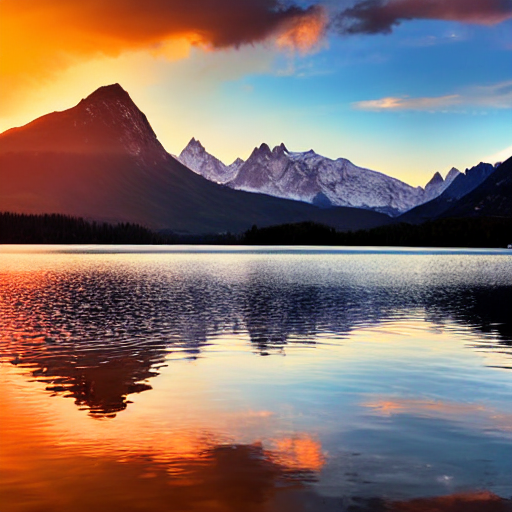

In [4]:
from diffusers import StableDiffusionPipeline
import torch
pipe = StableDiffusionPipeline.from_pretrained(
  "runwayml/stable-diffusion-v1-5",
  torch_dtype=torch.float16
).to("cuda")
prompt = "A beautiful sunset over a calm lake with mountains in the background"
image = pipe(prompt).images[0]
display(image)
image.save("sunset_image.png")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated Story:

Write a short story about: A futuristic city with flying cars and glowing skyscrapers. It's the story of a brilliant, daring young engineer who, from an early age, has the courage to challenge and challenge and defy the odds.

What do you think? Are you a fan of this novel?


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

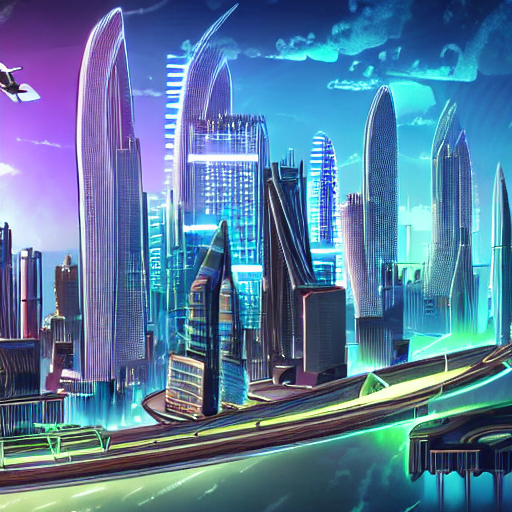


 Image saved as 'generated_future_city.png'


In [5]:
# 3. Generate Creativity with AI: Stories and Visuals from a Single Prompt

from transformers import pipeline
from diffusers import StableDiffusionPipeline
from IPython.display import display
import torch

prompt = "A futuristic city with flying cars and glowing skyscrapers"
story_generator = pipeline("text-generation", model="gpt2", no_repeat_ngram_size=3)
story = story_generator(f"Write a short story about: {prompt}", max_length=120,
num_return_sequences=1)[0]['generated_text']
print("Generated Story:\n")
print(story)
pipe = StableDiffusionPipeline.from_pretrained(
  "runwayml/stable-diffusion-v1-5",
  torch_dtype=torch.float16
).to("cuda")
image = pipe(prompt).images[0]
display(image)
image.save("generated_future_city.png")
print("\n Image saved as 'generated_future_city.png'")

In [6]:
# 4. Generate a Story from an Image Using AI
!pip install transformers torch pillow

In [8]:
from transformers import BlipProcessor, BlipForConditionalGeneration, pipeline
from PIL import Image
from google.colab import files

print("Upload an image (jpg/png):")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
display(image)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
inputs = processor(image, return_tensors="pt")

caption_ids = model.generate(**inputs)
caption = processor.decode(caption_ids[0], skip_special_tokens=True)
print("\n Image Caption:", caption)
story_generator = pipeline("text-generation", model="gpt2")
story_prompt = f"Write a short story about this: {caption}"
story = story_generator(story_prompt, max_length=80,
num_return_sequences=1)[0]['generated_text']
print("\n Generated Story:\n", story)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# 5. Generate a descriptive caption for a given image to explain what is happening in it.

print("Upload an image (jpg/png):")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
display(image)

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

inputs = processor(image, return_tensors="pt")
caption_ids = model.generate(**inputs)
caption = processor.decode(caption_ids[0], skip_special_tokens=True)
print("\n Image Caption:")

print(caption)

Output hidden; open in https://colab.research.google.com to view.